<font size="+3" color='#053c96'><h2><center> Credit Card Fraud Detection Notebook</h2></center></font>
<figure>
<center><img src ="https://www.cardexpert.in/wp-content/uploads/2020/06/credit-card-fraudulent-transaction-1024x567.jpg" width = "750" height = '600' alt="Financial Fraud Detection"/>

## Contributor: 
#### Umar Kabir

[Table of Contents](#table-of-contents)

- [Introduction](#introduction)
  * [Overview](#overview)
  * [Problem Statement](#problem-statement)
  * [Objectives](#goals)
- [Importing Libraries](#importing-dependencies)
- [Data](#data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Exploration](#data-exploration)
  * [Data Visualization](#data-visualization)
  * [Summary Statistics](#summary-statistics)
  * [Feature Correlation](#feature-correlation)
- [Data Preparation](#data-preparation)
  * [Data Cleaning](#data-cleaning)
  * [Feature Engineering](#feature-engineering)
  * [Data Transformation](#data-transformation)
- [Modeling](#modeling)
  * [Model Selection](#model-selection)
  * [Model Training](#model-training)
  * [Model Evaluation](#model-evaluation)
  * [Hyperparameter Tuning](#hyperparameter-tuning)
- [Results](#results)
  * [Analysis Results](#analysis-results)
  * [Model Performance](#model-performance)
  * [Feature Importance](#feature-importance)
  * [Implications](#implications)
- [Conclusion](#conclusion)
  * [Summary](#summary)
  * [Limitations](#limitations)
  * [Recommendations](#recommendations)
- [References](#references)

<a id='introduction'></a>
<font size="+2" color='#053c96'><b> Introduction</b></font>  
[back to top](#table-of-contents)  



Fraudulent credit card transactions pose significant challenges to financial institutions and payment processors, leading to substantial financial losses and reputational damage. Detecting and preventing such fraudulent activities is crucial for maintaining customer trust and maximizing revenue from transaction fees. In this project, we have been hired by FriendPay, a competitor of PayPal, to build a fraud detection model that will help them overcome these challenges and enhance their credit card fraud identification system.

<a id='overview'></a>
<font size="+1" color='#780404'><b> Overview</b></font>  
[back to top](#table-of-contents)

The dataset provided for this project contains credit card transactions made by European cardholders in September 2013. It consists of anonymized features resulting from a Principal Component Analysis (PCA) transformation, with the exception of the 'Time' and 'Amount' features. The 'Time' feature represents the time elapsed in seconds between each transaction and the first transaction in the dataset, while the 'Amount' feature denotes the transaction amount. The response variable, 'Class', indicates whether a transaction is fraudulent (1) or not (0).  

The dataset exhibits a highly imbalanced class distribution, with fraudulent transactions accounting for a mere 0.172% of the total transactions. This severe class imbalance poses a challenge in training a robust fraud detection model. Moreover, due to confidentiality concerns, the original features and additional background information about the data are not available. Therefore, our approach will rely on the transformed numerical features and leverage techniques such as outlier detection, feature engineering, and sampling methods to tackle the imbalanced data.  

To address the class imbalance, we will utilize a combination of over and undersampling techniques to generate a balanced training dataset. This approach involves oversampling the minority class (frauds) and undersampling the majority class (non-frauds), ensuring that the model receives sufficient exposure to fraudulent instances while maintaining a representative distribution of genuine transactions.  

In the exploration and preprocessing phase, we will analyze the relationships between the features through visualizations, detect and handle outliers using appropriate techniques such as boxplots, and assess the skewness and kurtosis of the feature distributions. Additionally, we will create new features using the 'Time' and 'Amount' variables to potentially capture additional patterns and improve the fraud detection capabilities of our model.  

For classification, we will employ a pipeline that combines preprocessing steps and the training of various classification algorithms. Evaluation metrics such as accuracy, precision, recall, F1 score, and the area under the precision-recall curve (AUPRC) will be utilized to assess the performance of different models. Ultimately, we aim to identify the best-performing model that effectively distinguishes between fraudulent and genuine transactions.  

<a id='problem-statement'></a>
<font size="+1" color='#780404'><b> Problem Statement</b></font>  
[back to top](#table-of-contents)  

Credit card fraud is a pressing issue that poses significant financial and reputational risks for financial institutions and payment processors. FriendPay, a competitor of PayPal, is facing challenges in accurately identifying fraudulent transactions, resulting in substantial losses from missed transaction fees. The provided dataset contains credit card transactions made by European cardholders in September 2013, with an imbalanced distribution of fraud cases, accounting for only 0.172% of all transactions.

<a id='goals'></a>
<font size="+1" color='#780404'><b> Objectives</b></font>  
[back to top](#table-of-contents)  

The main objective of this project is to build a fraud detection model that can effectively identify fraudulent transactions while minimizing false positives to ensure genuine transactions are not denied. The model should utilize the available numerical features derived from PCA transformation, along with the 'Time' and 'Amount' features, without access to the original features or additional background information.  

- Build a fraud detection model for FriendPay to identify fraudulent credit card transactions.
- Utilize numerical features derived from PCA transformation, along with 'Time' and 'Amount' features.
- Handle the imbalanced dataset by employing a combination of over and undersampling techniques.
- Conduct exploratory data analysis to understand feature relationships and detect outliers.
- Create new features using 'Time' and 'Amount' to enhance fraud detection capabilities.
- Construct a pipeline to preprocess the data and train various classification algorithms.
- Evaluate model performance using the area under the precision-recall curve (AUPRC).
- Select the best-performing model and demonstrate its impact on revenue generation by reducing false positives and accurately identifying fraudulent transactions.

<a id='importing-dependencies'></a>
<font size="+2" color='#053c96'><b> Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [3]:
"""{{libraries}}"""
import sys
# Insert the parent path relative to this notebook so we can import from the src folder.
sys.path.insert(0, "..")
# Import libraries
import pandas as pd
import numpy as np
import math
import pickle
import benford as bf
#from benford_law import Benford
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('ggplot') #Applying style to graphs
from functools import reduce
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
from scipy.stats import chi2
from scipy.stats import linregress
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Libraries for classification
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from PyNomaly import loop
# Libraries for performance evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import shap
from sklearn.metrics import precision_recall_curve, auc
#import lime
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

<a id='data'></a>
<font size="+2" color='#053c96'><b> Data</b></font>  
[back to top](#table-of-contents)  

For this project, we will use a somewhat de-identified dataset of credit card transactions in Europe. The dataset contains transactions made by credit cards in September 2013 by European cardholders.

<a id='data-sources'></a>
<font size="+1" color='#780404'><b> Data Sources</b></font>  
[back to top](#table-of-contents)  

- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018, IEEE

- Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG Ph.D. thesis (supervised by G. Bontempi)

- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018, Springer International Publishing

- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

- Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook

In [4]:
df = pd.read_csv('my_paypal_creditcard.csv')

<a id='exploratory-data-analysis'></a>
<font size="+2" color='#053c96'><b> Exploratory Data Anaysis</b></font>  
[back to top](#table-of-contents)

<a id='data-exploration'></a>
<font size="+1" color='#780404'><b> Data Exploration</b></font>  
[back to top](#table-of-contents)

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<a id='data-visualization'></a>
<font size="+1" color='#780404'><b> Data Visualization</b></font>  
[back to top](#table-of-contents)

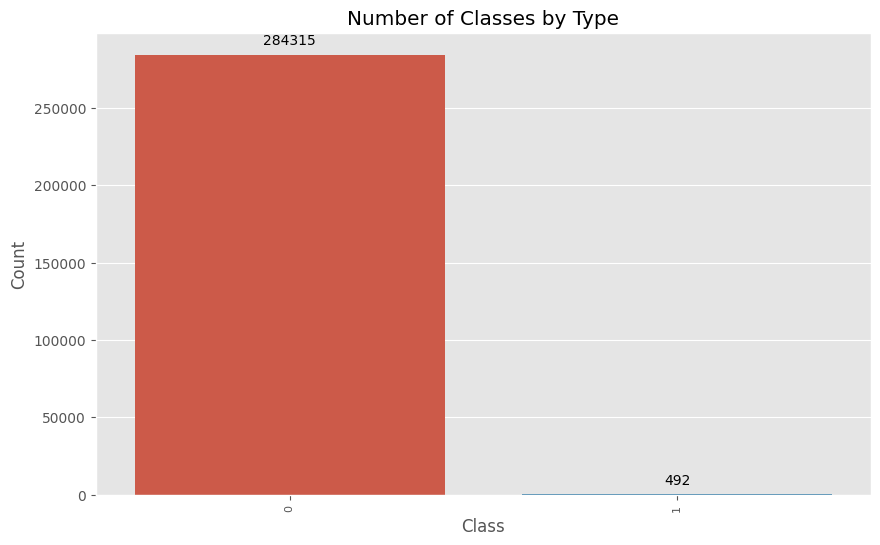

In [7]:

# count the number of occurrences for each type
type_counts = df['Class'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Number of Classes by Type')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


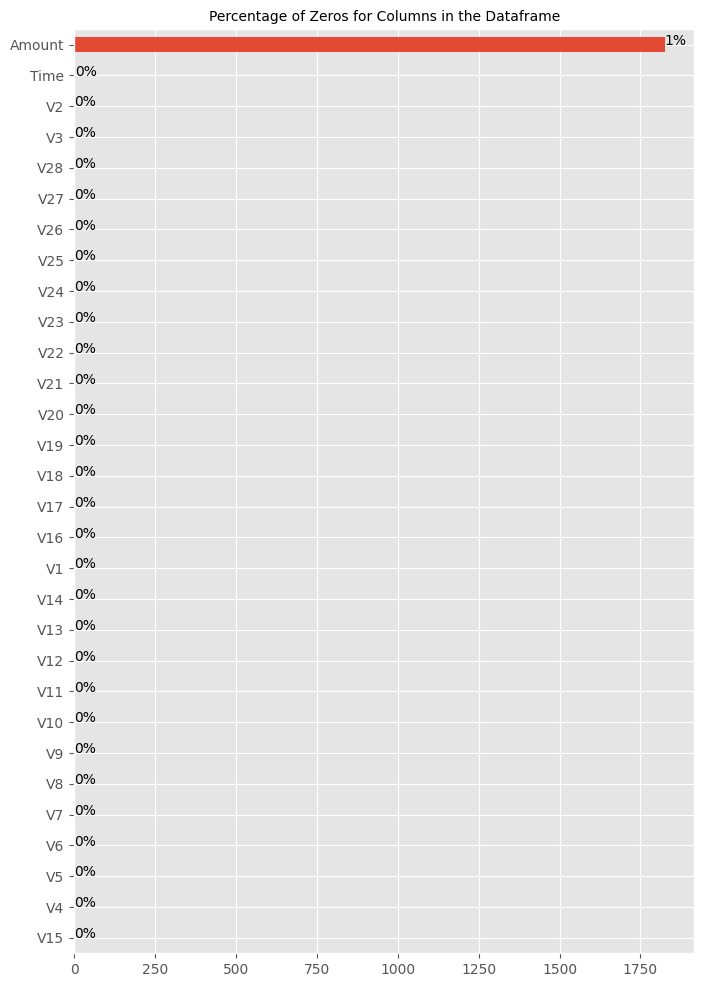

In [8]:
ax = (df.drop('Class',axis=1) == 0).sum().sort_values(ascending=False)[:30][::-1].plot(kind='barh', figsize=(8, 12))
plt.title('Percentage of Zeros for Columns in the Dataframe', fontdict={'size': 10})
for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width() / df.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax.annotate(percentage, (x, y))

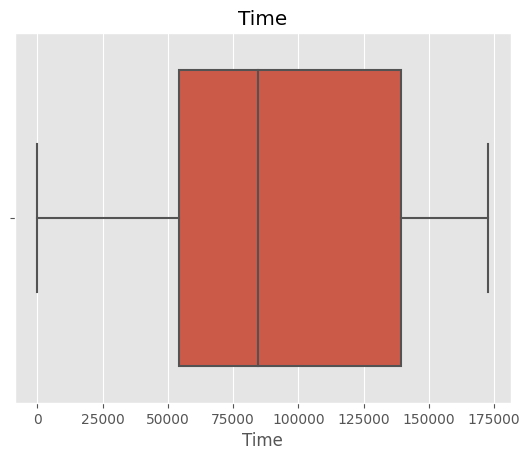

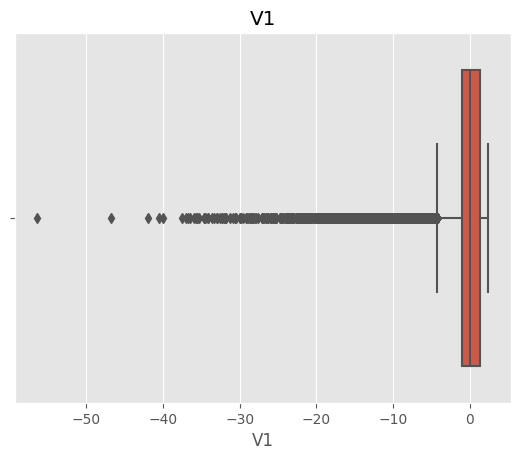

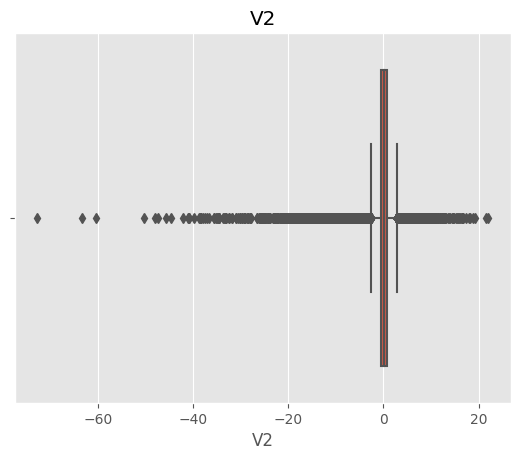

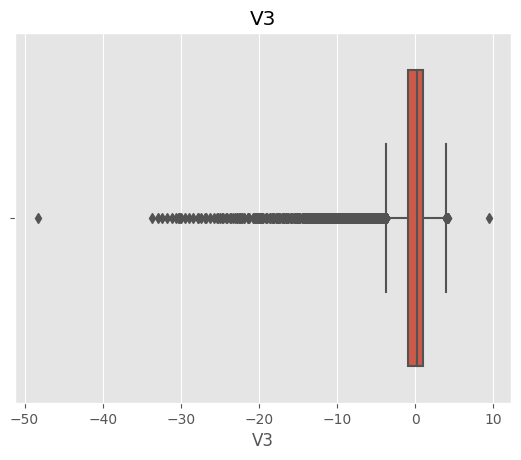

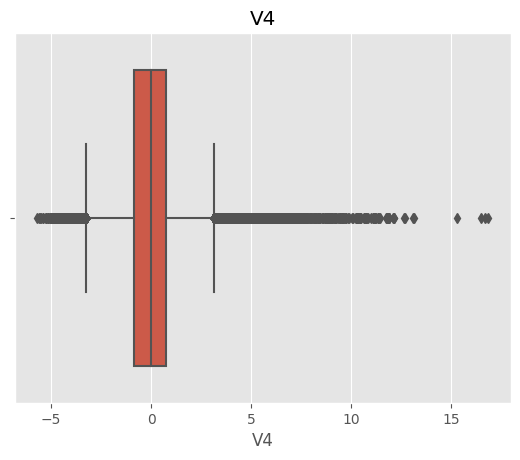

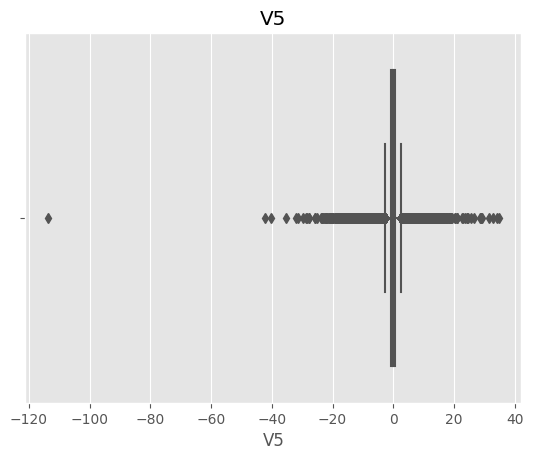

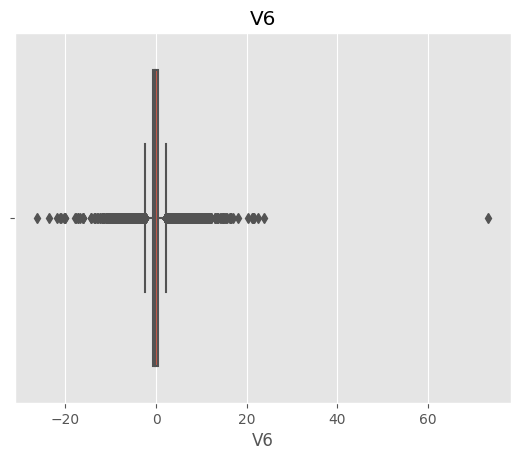

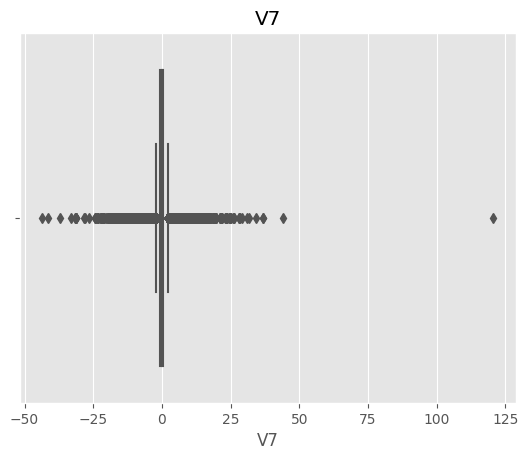

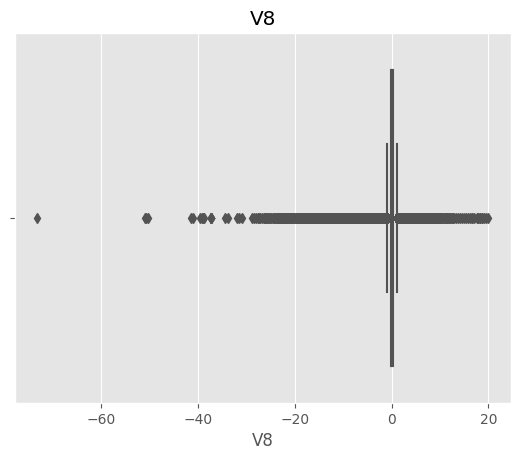

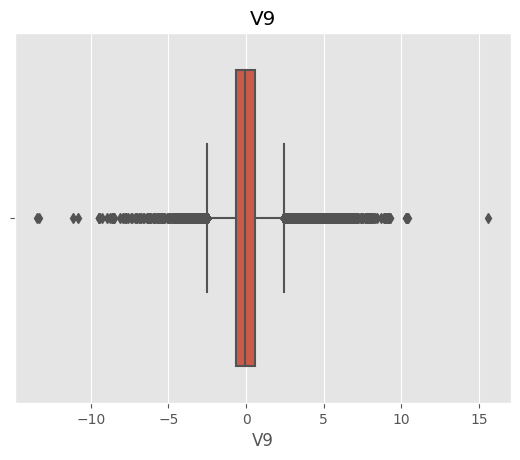

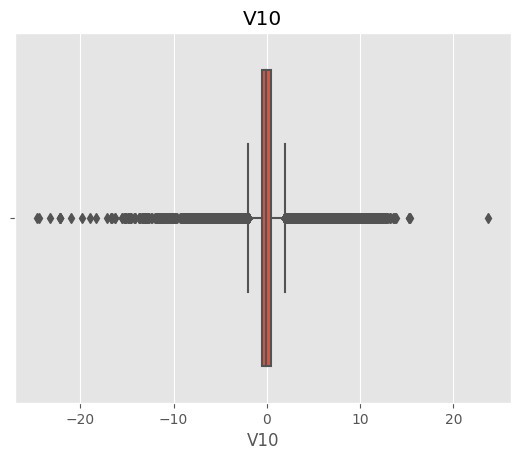

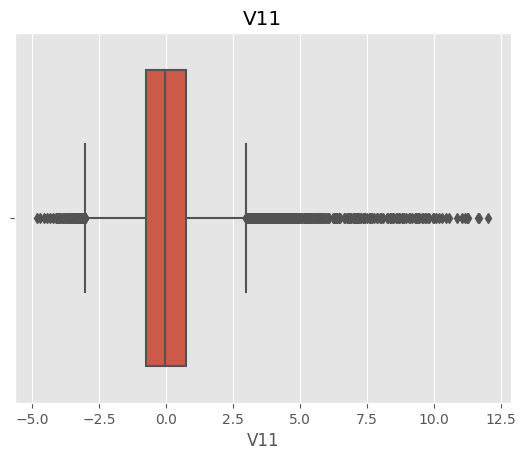

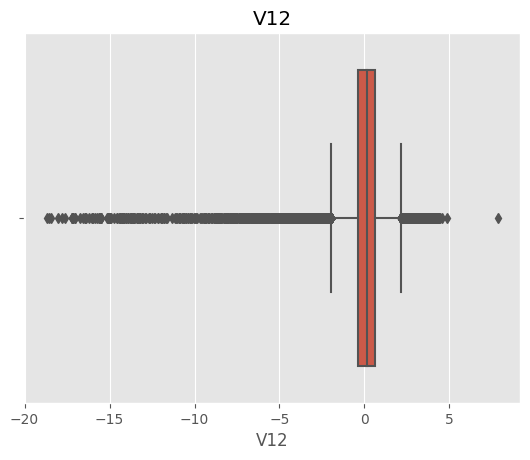

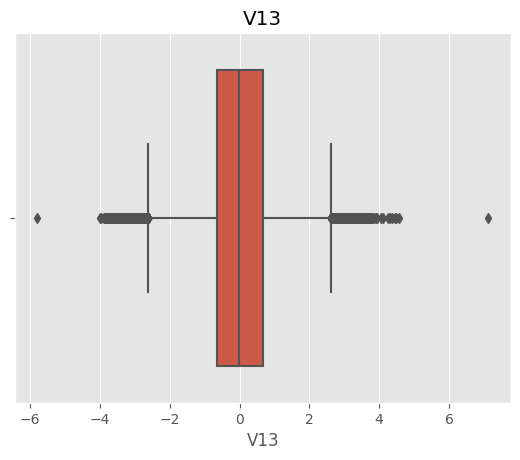

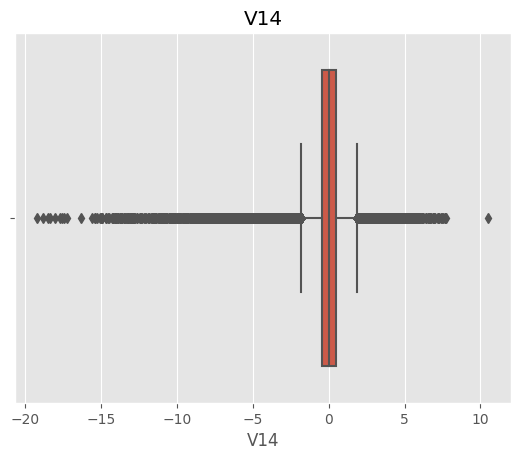

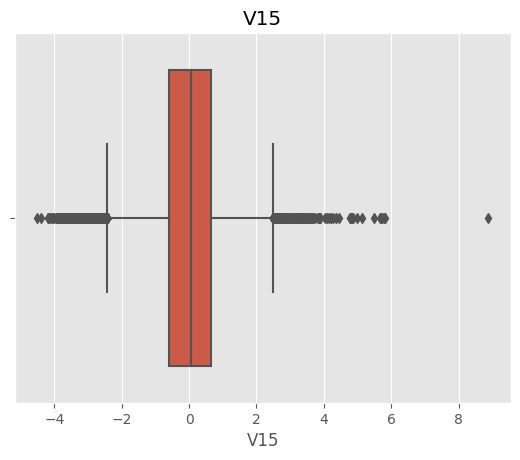

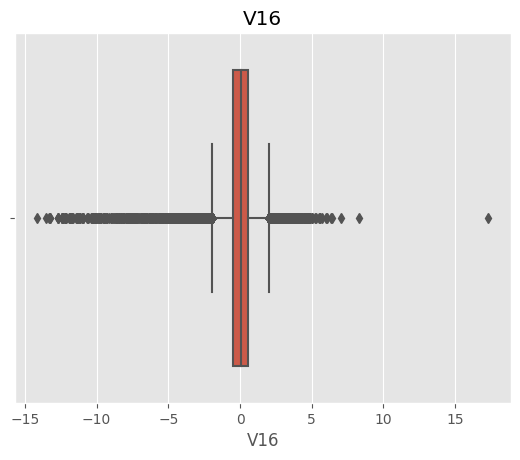

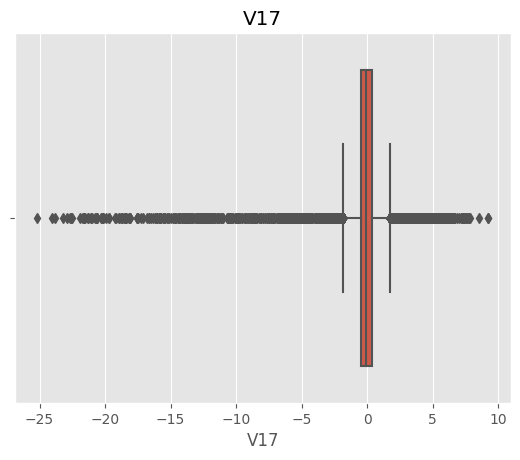

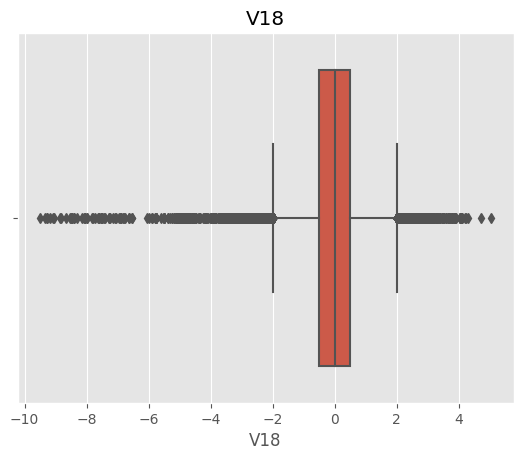

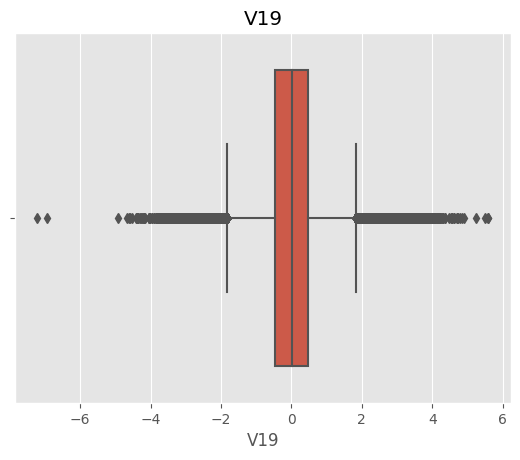

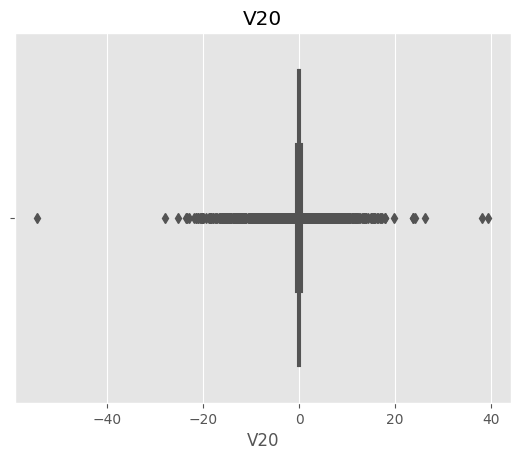

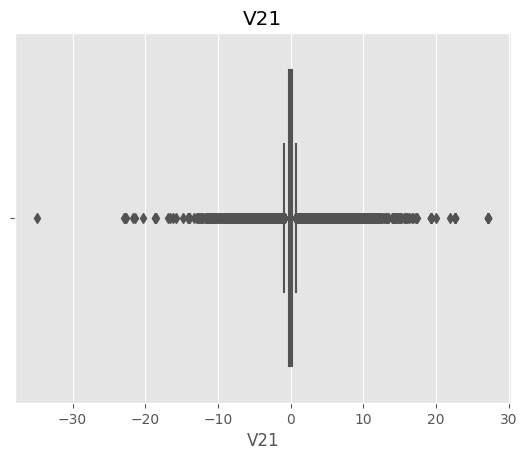

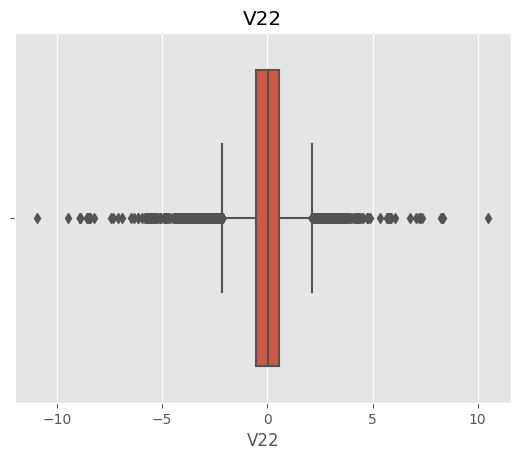

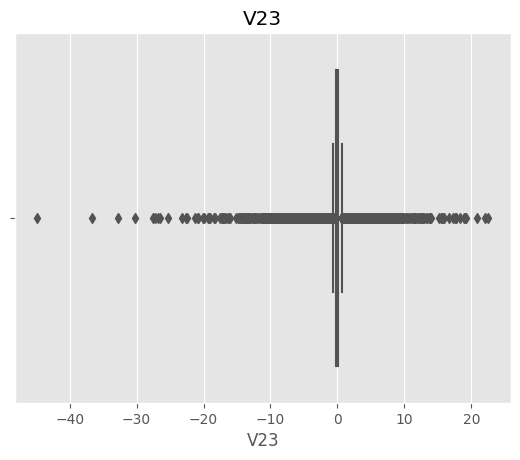

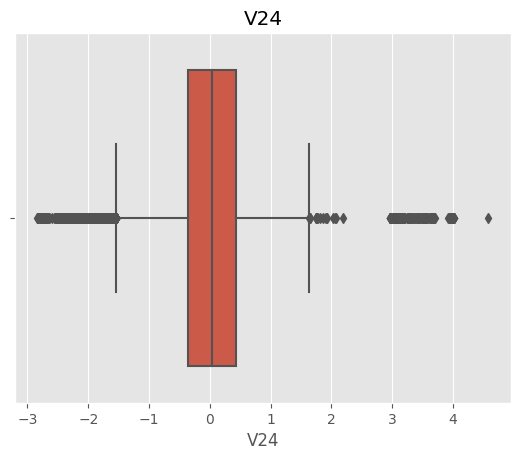

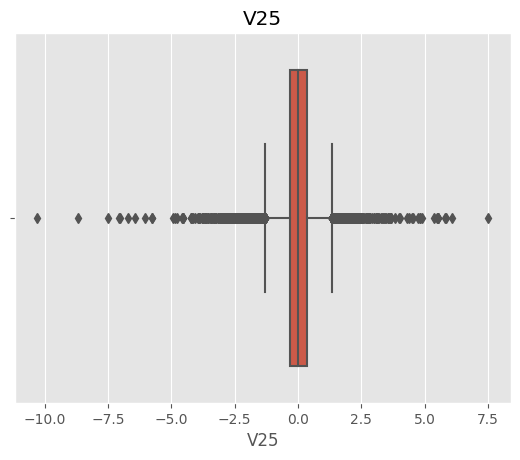

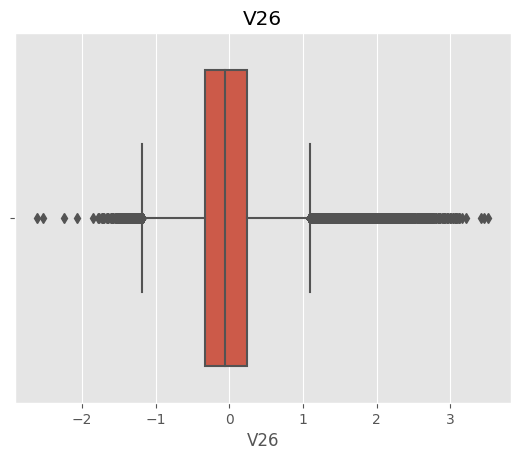

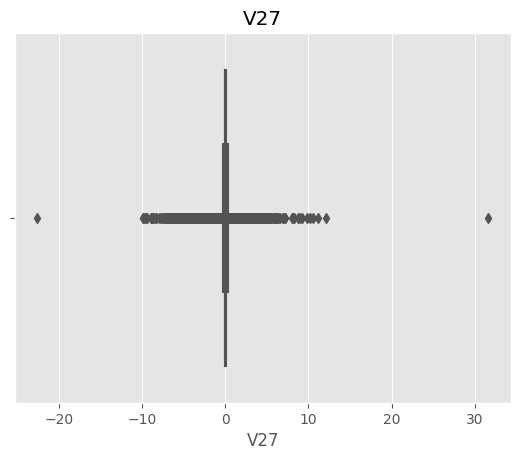

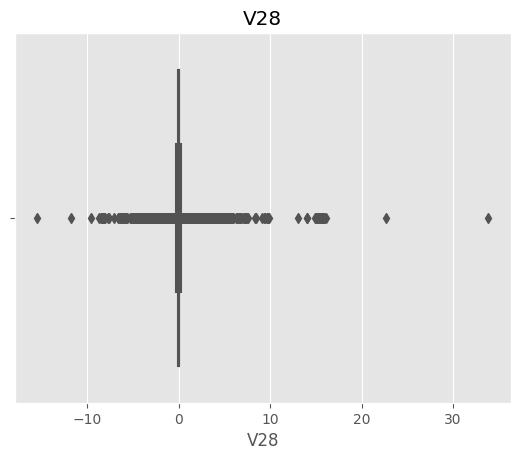

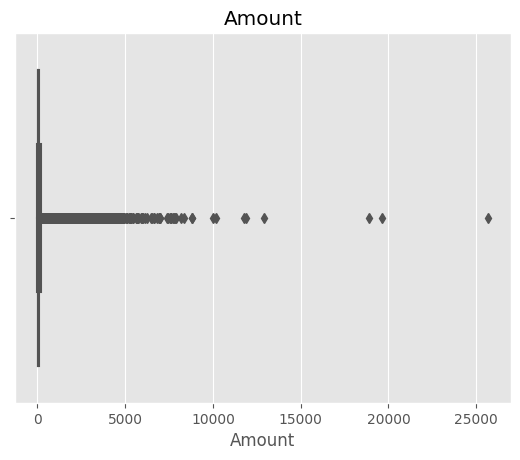

In [9]:
for column in df.columns[0:30]:
    sns.boxplot(x=df[column])
    plt.title(column)  # Set the title of the plot to the column name
    plt.show()

#### Scatter Plots

A scatter plot is a type of chart that shows the relationship between two variables. The variables are plotted on the x-axis and y-axis, and each data point is represented by a dot. The dots are then connected with a line to show the trend of the data.

Scatter plots can also be used to identify outliers. Outliers are data points that do not fit the trend of the data. For example, in the scatter plot above, there is one dot that is far away from the rest of the dots. This dot is an outlier. Outliers can be important to identify, as they may indicate an error in the data or a special case.

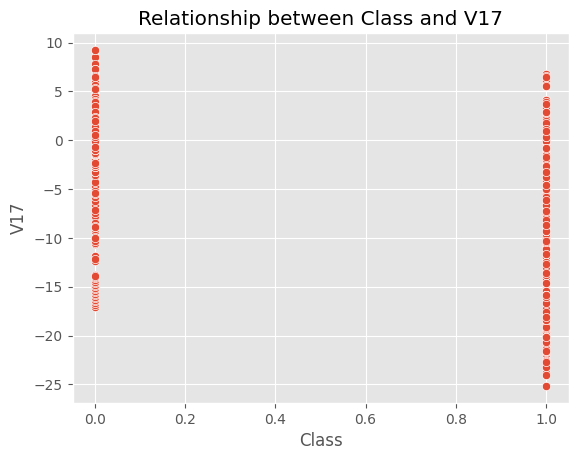

In [61]:
sns.scatterplot(x="Class", y="V17", data=df)
plt.title("Relationship between Class and V17")
plt.show()

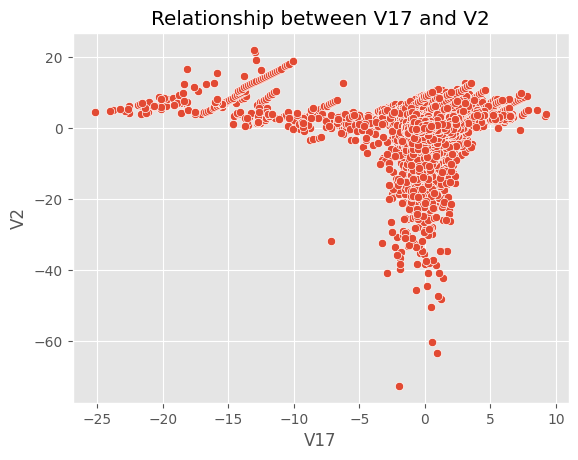

In [60]:
sns.scatterplot(x="V17", y="V2", data=df)
plt.title("Relationship between V17 and V2")
plt.show()

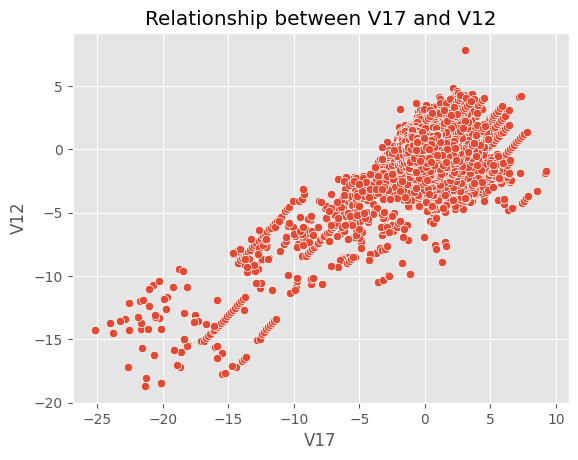

In [59]:
sns.scatterplot(x="V17", y="V12", data=df)
plt.title("Relationship between V17 and V12")
plt.show()

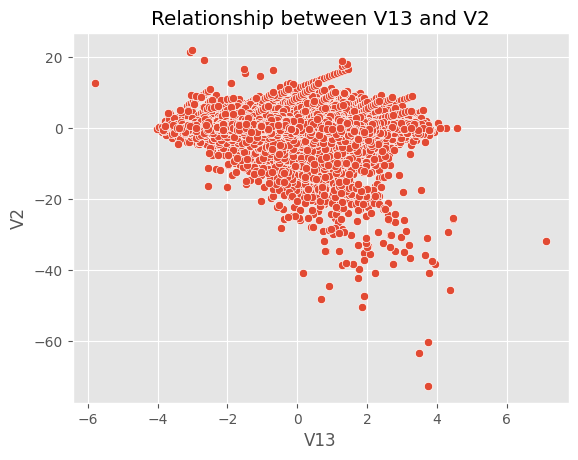

In [57]:
sns.scatterplot(x="V13", y="V2", data=df)
plt.title("Relationship between V13 and V2")
plt.show()

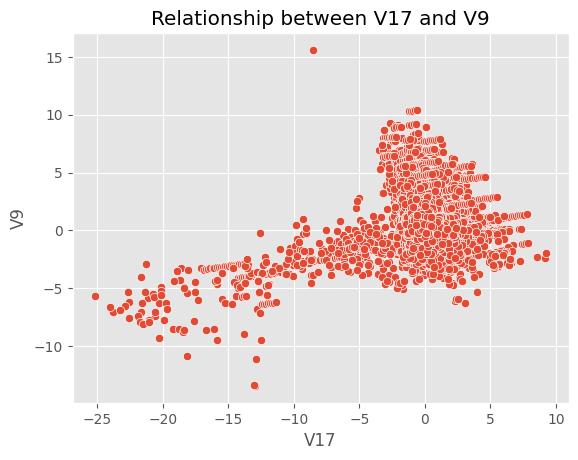

In [58]:
sns.scatterplot(x="V17", y="V9", data=df)
plt.title("Relationship between V17 and V9")
plt.show()

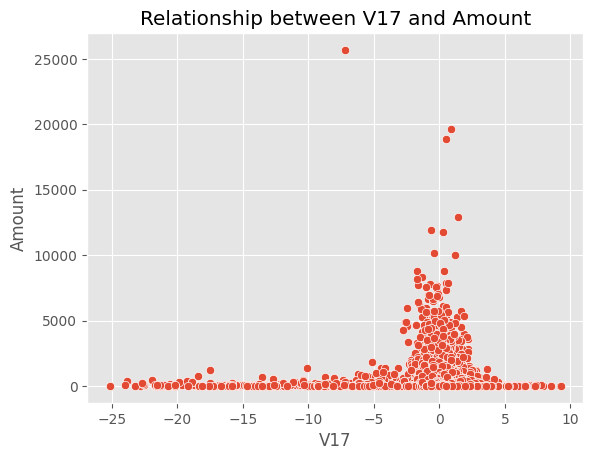

In [63]:
sns.scatterplot(x="V17", y="Amount", data=df)
plt.title("Relationship between V17 and Amount")
plt.show()

<a id='summary-statistics'></a>
<font size="+1" color='#780404'><b> Summary Statistics</b></font>  
[back to top](#table-of-contents)

In [11]:
df.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [12]:
def skew_kurt(df, col):
    # Calculate skewness and kurtosis of column
    _skewness = skew(df[col])
    _kurtosis = kurtosis(df[col])

    # Create histogram of column with mean, median, and mode
    fig, ax = plt.subplots(figsize=(20, 16))
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    ax.axvline(df[col].mode()[0], color='b', linestyle='--', label='Mode')
    ax.legend()

    # Add text annotation for skewness and kurtosis values
    ax.annotate('Skewness: {:.2f}'.format(_skewness), xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12)
    ax.annotate('Kurtosis: {:.2f}'.format(_kurtosis), xy=(0.5, 0.85), xycoords='axes fraction', fontsize=12)

    # Set x-axis label font size
    plt.xticks(fontsize=12)

    # Set x-axis range from 0 to 95th percentile of data
    ax.set_xlim(0, df[col].quantile(0.95))

    plt.show()

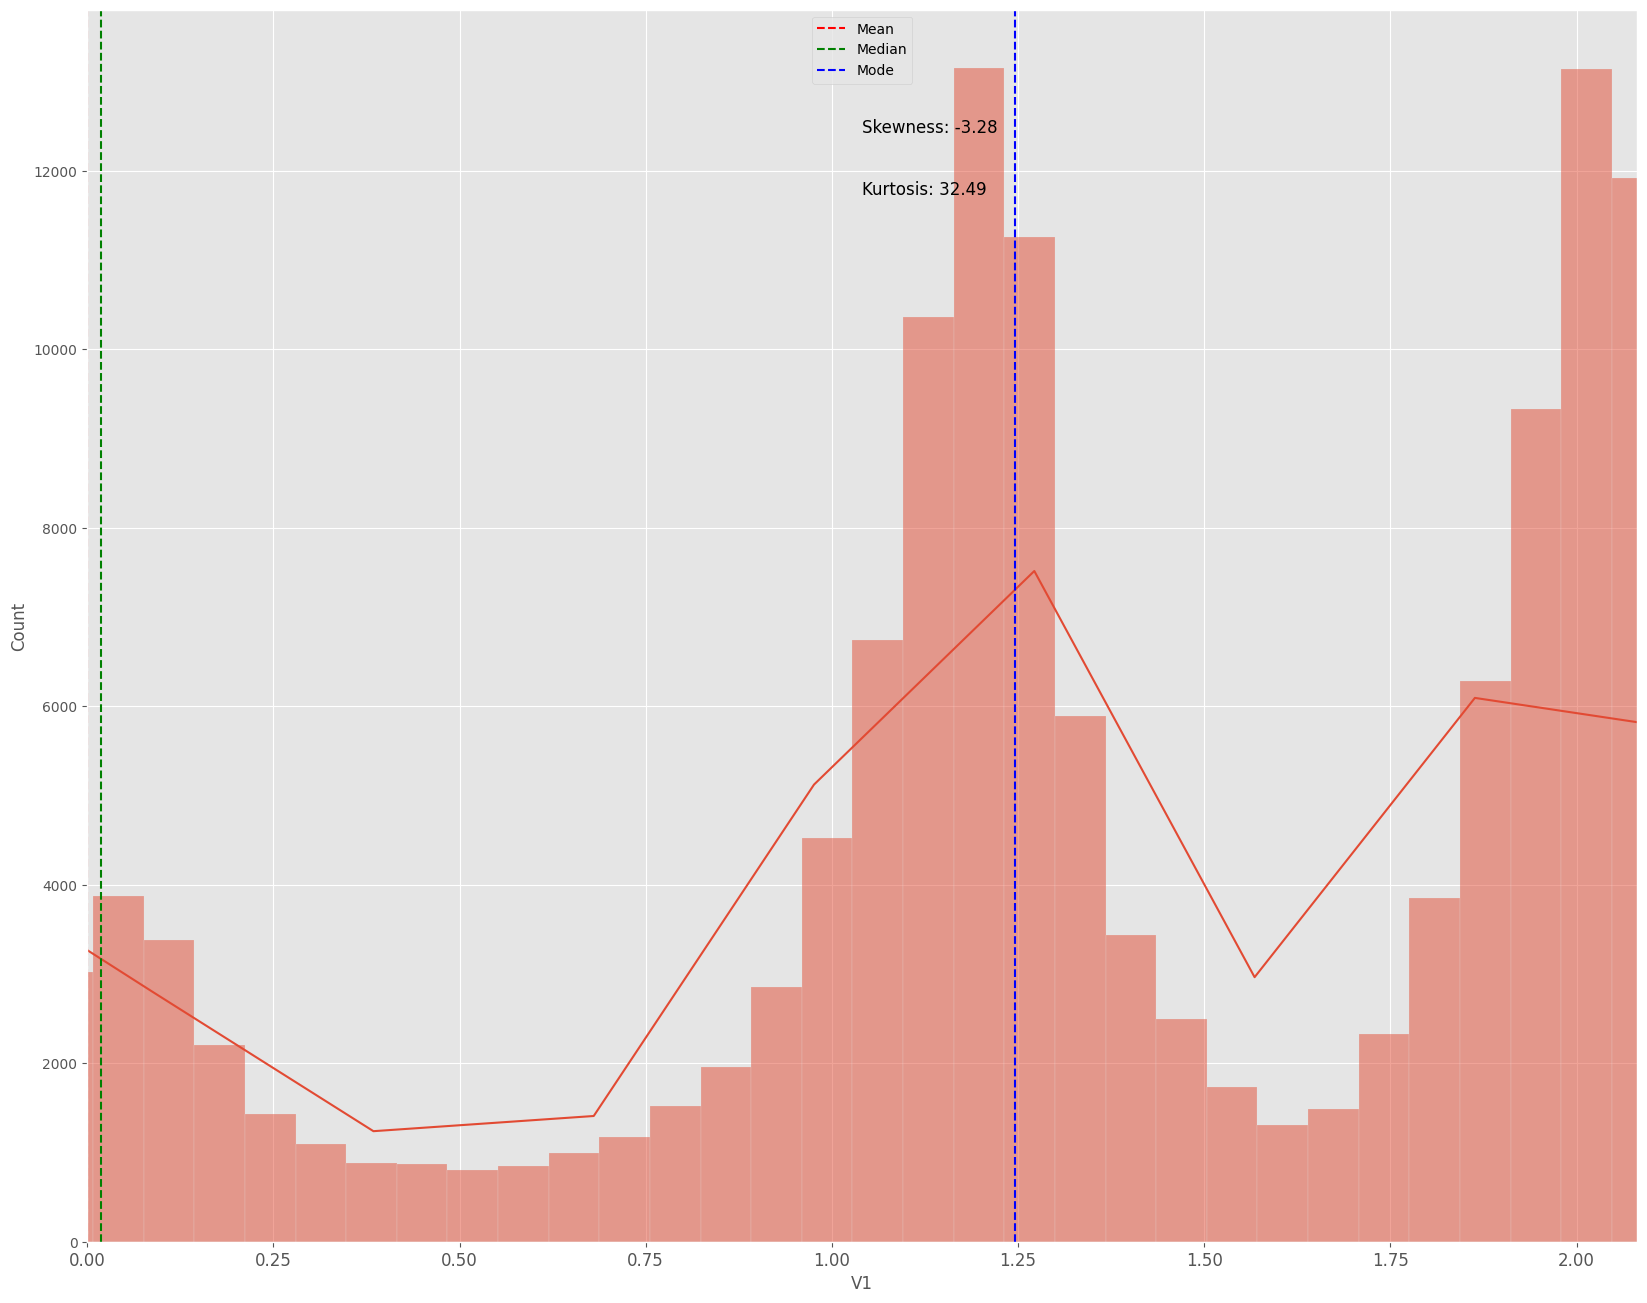

In [13]:
skew_kurt(df, "V1")

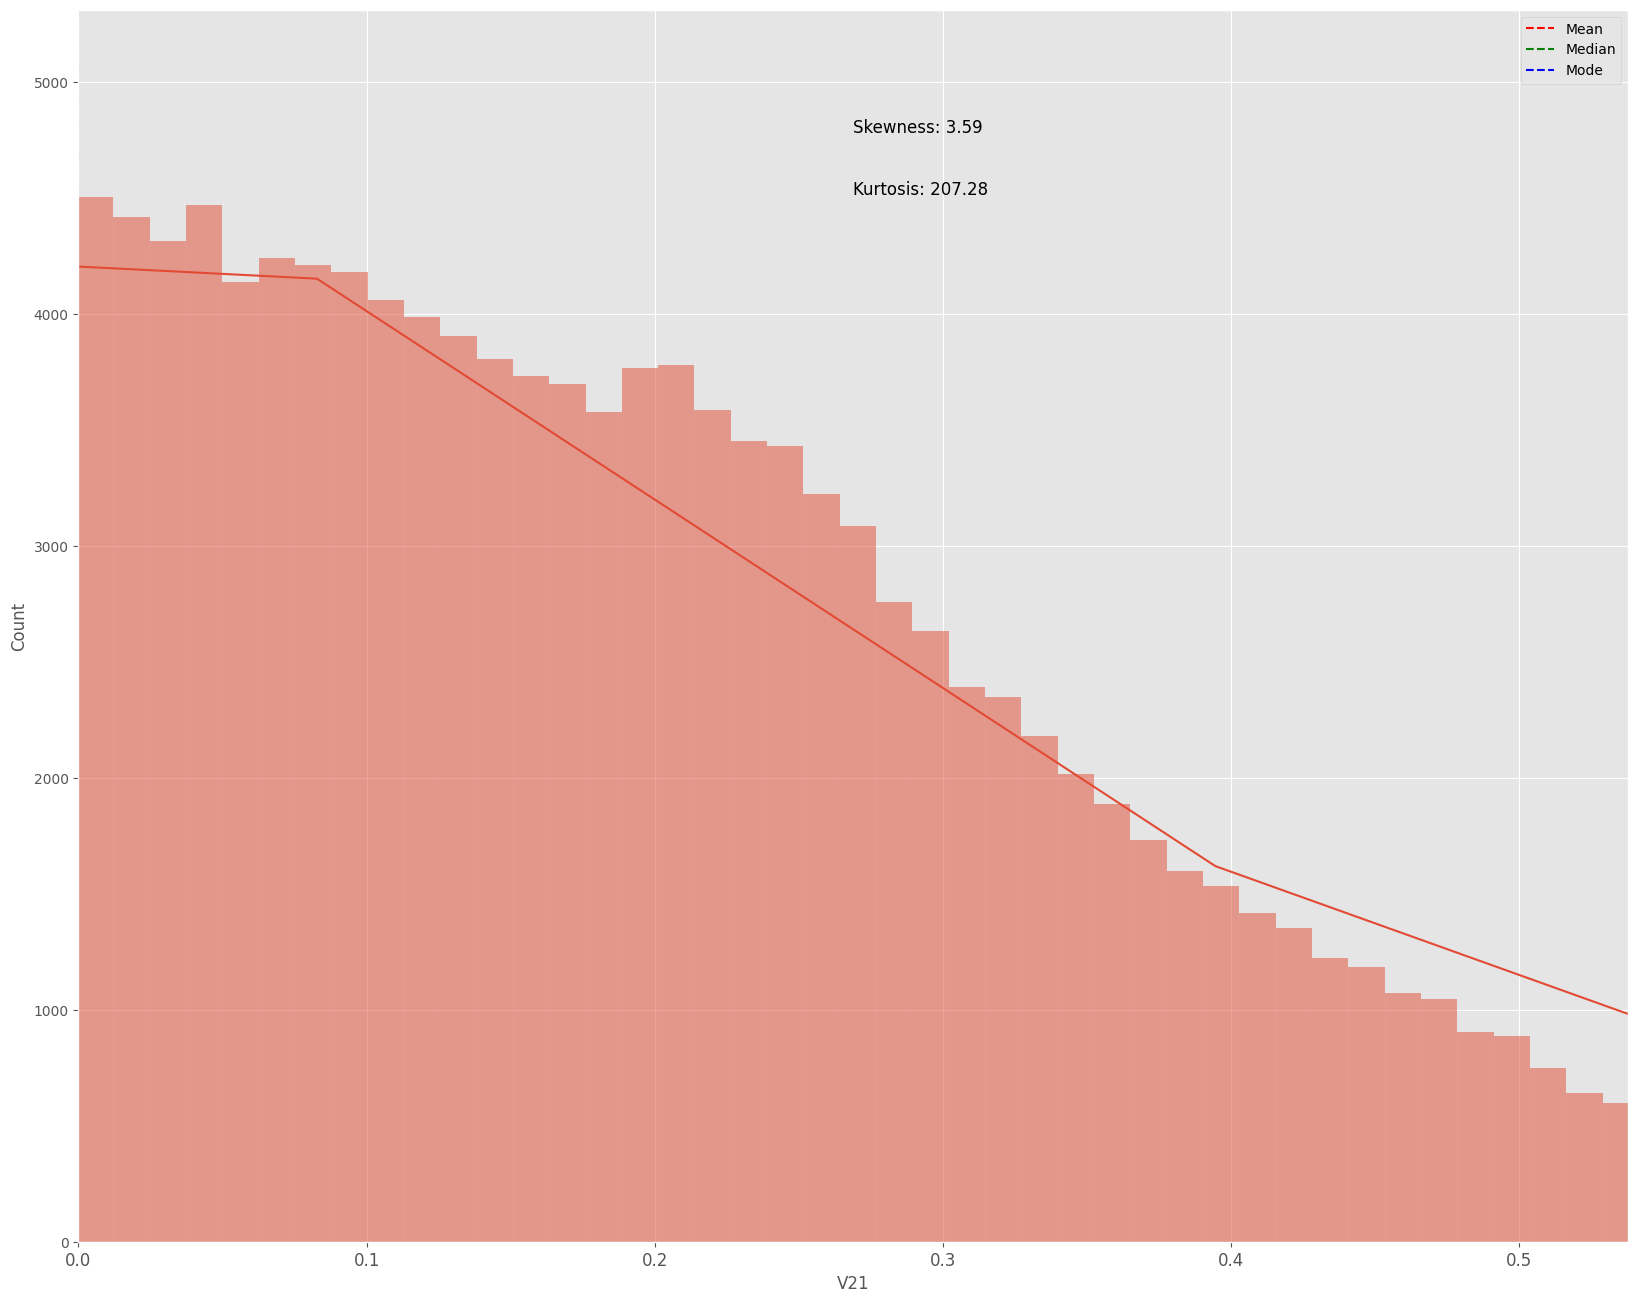

In [14]:
skew_kurt(df, "V21")

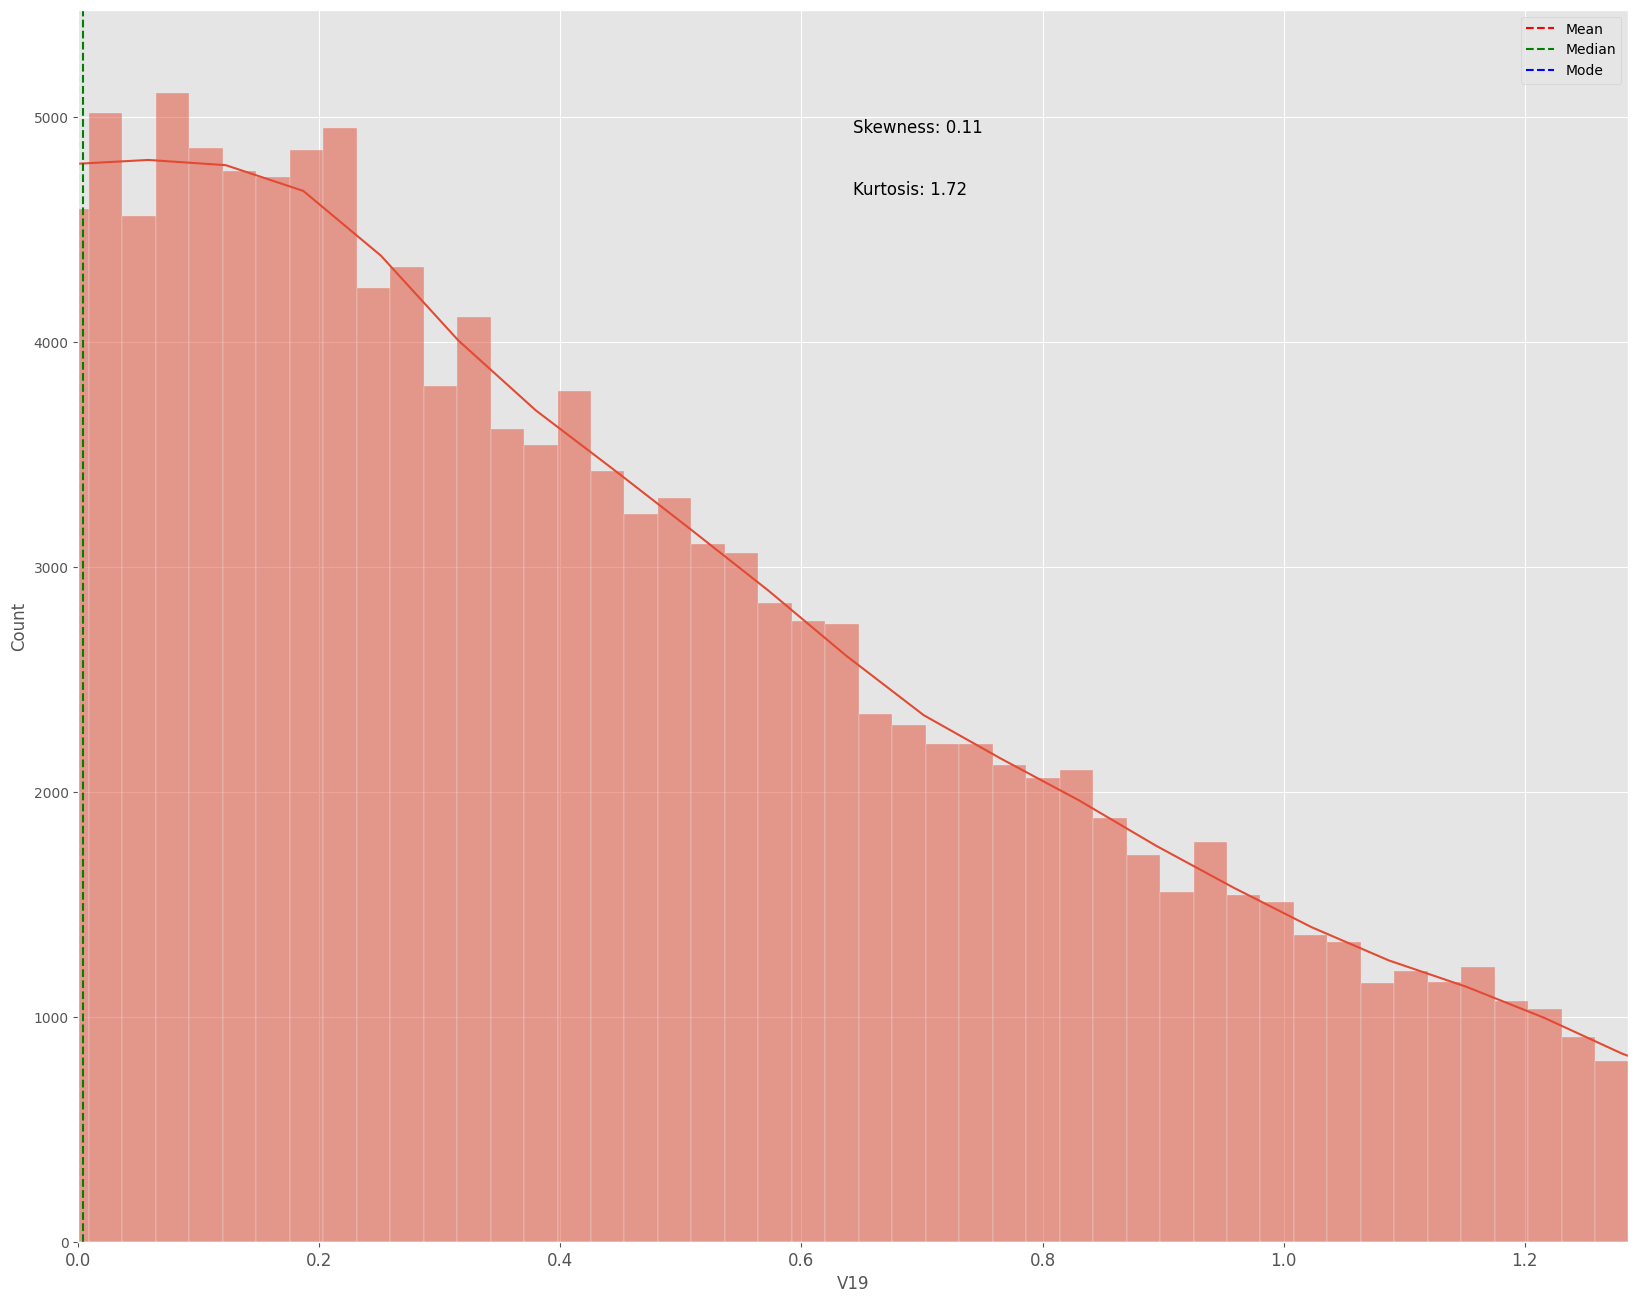

In [15]:
skew_kurt(df, "V19")

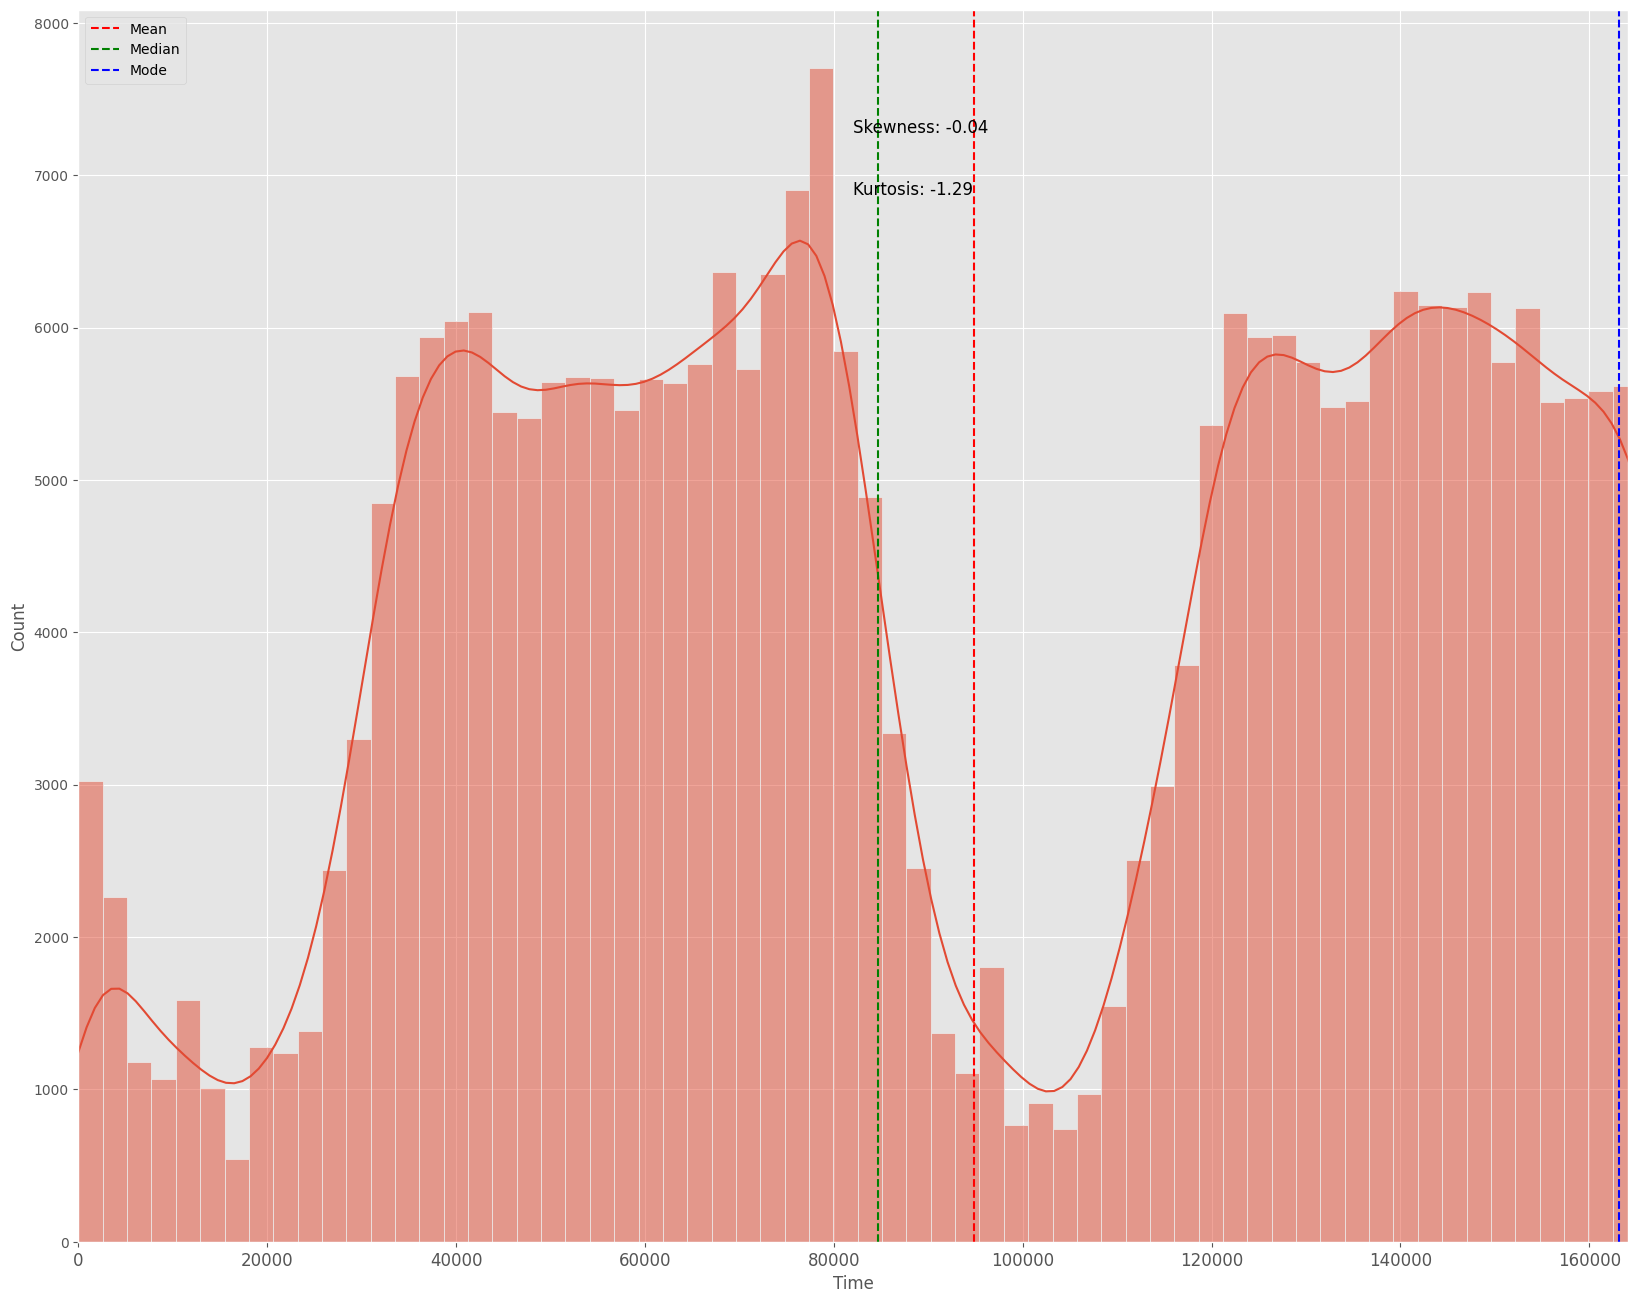

In [16]:
skew_kurt(df, "Time")

<a id='feature-correlation'></a>
<font size="+1" color='#780404'><b> Feature Correlation</b></font>  
[back to top](#table-of-contents)

In [17]:
df_corr = df.corr()

In [18]:
df_corr['Class']

Time     -0.01
V1       -0.10
V2        0.09
V3       -0.19
V4        0.13
V5       -0.09
V6       -0.04
V7       -0.19
V8        0.02
V9       -0.10
V10      -0.22
V11       0.15
V12      -0.26
V13      -0.00
V14      -0.30
V15      -0.00
V16      -0.20
V17      -0.33
V18      -0.11
V19       0.03
V20       0.02
V21       0.04
V22       0.00
V23      -0.00
V24      -0.01
V25       0.00
V26       0.00
V27       0.02
V28       0.01
Amount    0.01
Class     1.00
Name: Class, dtype: float64

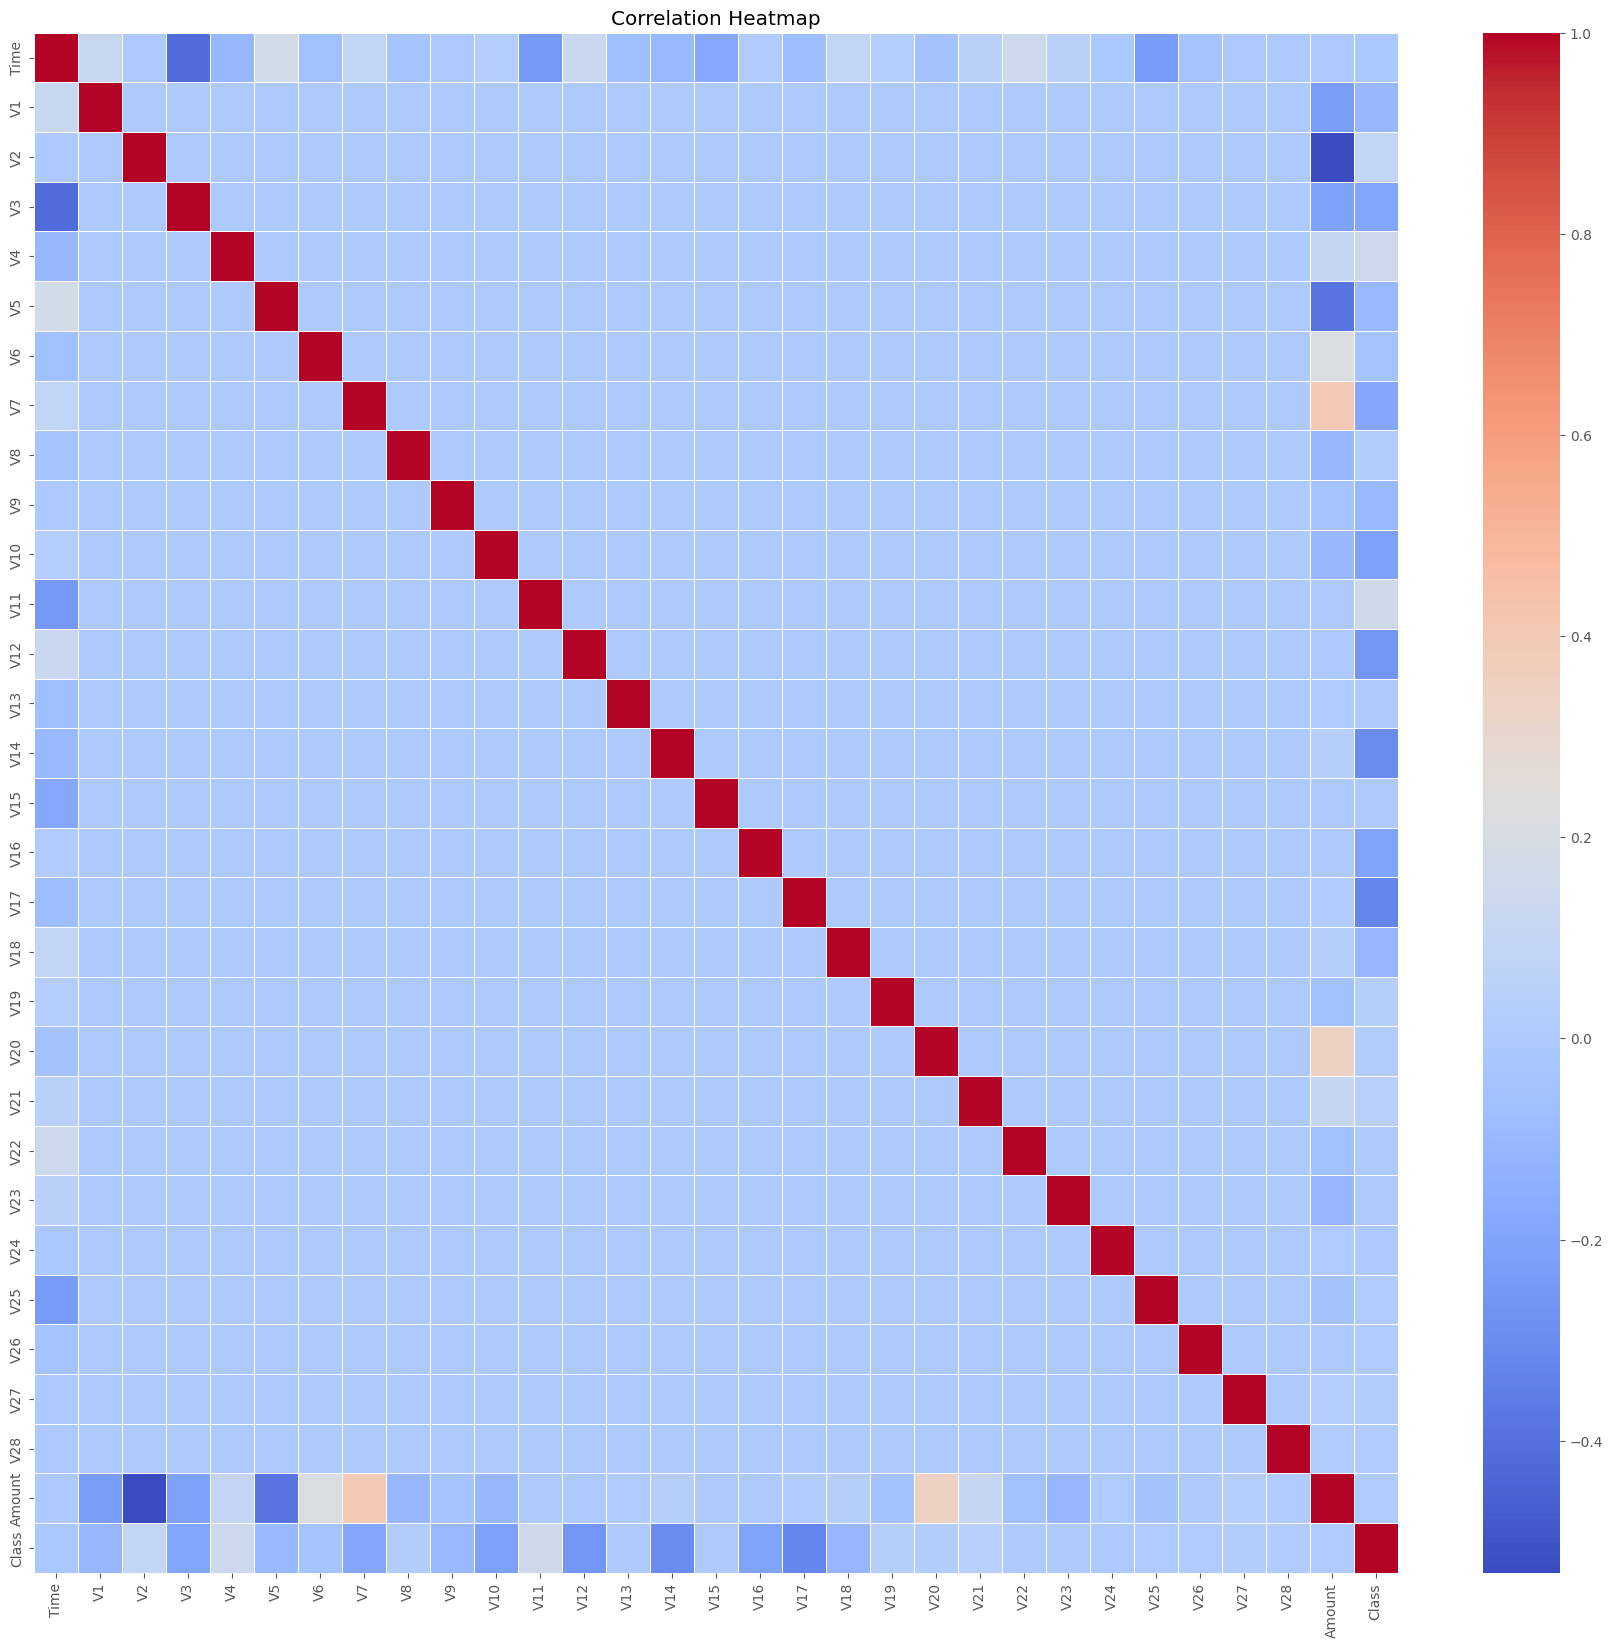

In [19]:
plt.figure(figsize=(22, 20))  # Set the figure size

sns.heatmap(df_corr, annot=False, cmap='coolwarm', linewidths=0.5)  # Create the heatmap

plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Show the plot

<a id='data-preparation'></a>
<font size="+2" color='#053c96'><b> Data Preparation</b></font>  
[back to top](#table-of-contents)

<a id='data-cleaning'></a>
<font size="+1" color='#780404'><b> Data Cleaning</b></font>  
[back to top](#table-of-contents)

In [20]:
# Cut outliers
cat_data = df.loc[:, ['Amount', 'Time', 'Class']]
df_new = df.drop(['Class', 'Amount', 'Time'], axis=1)
top_quantiles = df_new.quantile(0.97)
outliers_top = (df_new > top_quantiles)

low_quantiles = df_new.quantile(0.03)
outliers_low = (df_new < low_quantiles)

new_df = df_new.mask(outliers_top, top_quantiles, axis=1)
new_df = df_new.mask(outliers_low, low_quantiles, axis=1)

new_df = df_new.join(cat_data)

# Take a look at the dataframe post-outliers cut
new_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,94813.86,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,47488.15,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,54201.50,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,84692.00,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,139320.50,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,172792.00,1.00


<a id='feature-engineering'></a>
<font size="+1" color='#780404'><b> Feature Engineering</b></font>  
[back to top](#table-of-contents)

In [21]:
new_df['Time_minutes'] = new_df['Time'] / 60
new_df['Time_hours'] = new_df['Time'] / 3600
new_df['Hour_of_day'] = pd.to_datetime(new_df['Time'], unit='s').dt.hour

In [22]:
new_df['Amount_log'] = np.log1p(new_df['Amount'])

In [23]:
scaler = MinMaxScaler()
new_df['Amount_normalized'] = scaler.fit_transform(new_df['Amount'].values.reshape(-1, 1))

<a id='data-transformation'></a>
<font size="+1" color='#780404'><b> Data Transformation</b></font>  
[back to top](#table-of-contents)
<a id='modeling'></a>

In [24]:
new_df.shape

(284807, 36)

In [25]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

#### Combining Over and Undersampling

In [26]:
# Define the over-sampling and under-sampling techniques
over_sampler = SMOTE(sampling_strategy=0.01, random_state=0)
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=0)

# Create the pipeline by combining the over-sampling and under-sampling techniques
pipeline = Pipeline([
    ('over_sampling', over_sampler),
    ('under_sampling', under_sampler)
])

# Apply the combined sampling technique to the data
X_resampled, y_resampled = pipeline.fit_resample(X, y)


In [27]:
noncat = new_df
# Calculate the correlation between each feature and the target variable
corr = noncat.corr()['Class'].abs().sort_values(ascending=False)

# Select the top N features with the highest correlation
top_features = corr[1:26].index

# Print the top features
f1 = list(top_features)

In [29]:
# Train a random forest classifier on the entire dataset
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)

# Get the feature importances from the trained model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Select the top N features based on their importance scores
top_features1 = X.columns[indices][:25]

# Print the top features
f2 = list(top_features1)

In [30]:
importances = mutual_info_classif(X_resampled, y_resampled)
feat_importance = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importance_sorted = feat_importance.sort_values(ascending=False)
main_features = feat_importance_sorted[0:25].index
f3 = list(main_features)

In [31]:
features = f1 + f2 + f3
selected_features = list(set(features))

In [32]:
X_resampled = X_resampled[selected_features]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

<a id='modeling'></a>

<font size="+2" color='#053c96'><b> Modeling</b></font>  
[back to top](#table-of-contents)

<a id='model-selection'></a>

<font size="+1" color='#780404'><b> Model Selection</b></font>  
[back to top](#table-of-contents)

In [34]:
model_pipeline = []
#model_pipeline.append(LinearSVC())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(DecisionTreeClassifier())
#model_pipeline.append(SVC())
model_pipeline.append(LogisticRegression())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

<a id='model-training'></a>

<font size="+1" color='#780404'><b> Model Training</b></font>  
[back to top](#table-of-contents)

In [35]:
model_list = ['RandomForestClassifier', 'DecisionTreeClassifier',
              'LogisticRegression', 'KNeighborsClassifier', 'GradientBoostingClassifier']
f1_list = []
pr_list = []
rc_list = []
acc_list = []
cm_list = []
auprc_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))
    pr_list.append(precision_score(y_test, y_pred, average='weighted'))
    rc_list.append(recall_score(y_test, y_pred, average='weighted'))
    acc_list.append(accuracy_score(y_test, y_pred))
    cm_list.append(confusion_matrix(y_test, y_pred))
    
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    auprc = auc(recall, precision)
    auprc_list.append(auprc)


<a id='model-evaluation'></a>

<font size="+1" color='#780404'><b> Model Evaluation</b></font>  
[back to top](#table-of-contents)

In [36]:
c_result = pd.DataFrame({'Model': model_list, 'F1': f1_list, 'Precision': pr_list, 'Recall': rc_list, 'Accuracy': acc_list, 'AUPRC': auprc_list})
c_result

,Model,F1,Precision,Recall,Accuracy,AUPRC
0,RandomForestClassifier,0.98,0.98,0.98,0.98,1.00
1,DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.97
2,LogisticRegression,0.96,0.96,0.96,0.96,0.99
3,KNeighborsClassifier,0.77,0.77,0.77,0.77,0.84
4,GradientBoostingClassifier,0.97,0.97,0.97,0.97,1.00


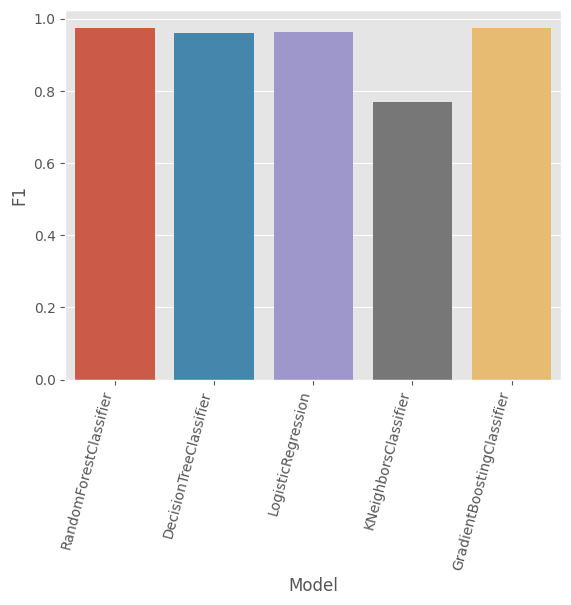

In [37]:
f1_df = c_result[['Model', 'F1']]
ax = sns.barplot(y = 'F1', x = 'Model', data = f1_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right');

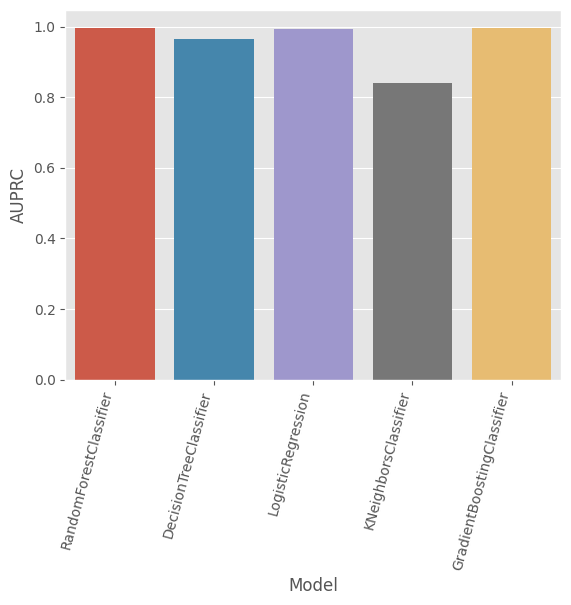

In [38]:
auprc_df = c_result[['Model', 'AUPRC']]
ax = sns.barplot(y = 'AUPRC', x = 'Model', data = auprc_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right');

In [39]:
iforest = IsolationForest(max_samples='auto',bootstrap=False, n_jobs=-1, random_state=42, contamination=0.001725)
iforest_= iforest.fit(new_df.drop('Class', axis=1))
y_pred = iforest_.predict(new_df.drop('Class', axis=1))

In [40]:
y_score = iforest.decision_function(new_df.drop('Class', axis=1))

In [41]:
neg_value_indices = np.where(y_score<0)
len(neg_value_indices[0])

492

In [42]:
exp = shap.TreeExplainer(iforest) #Explainer
shap_values = exp.shap_values(new_df.drop('Class', axis=1))  #Calculate SHAP values
shap.initjs()

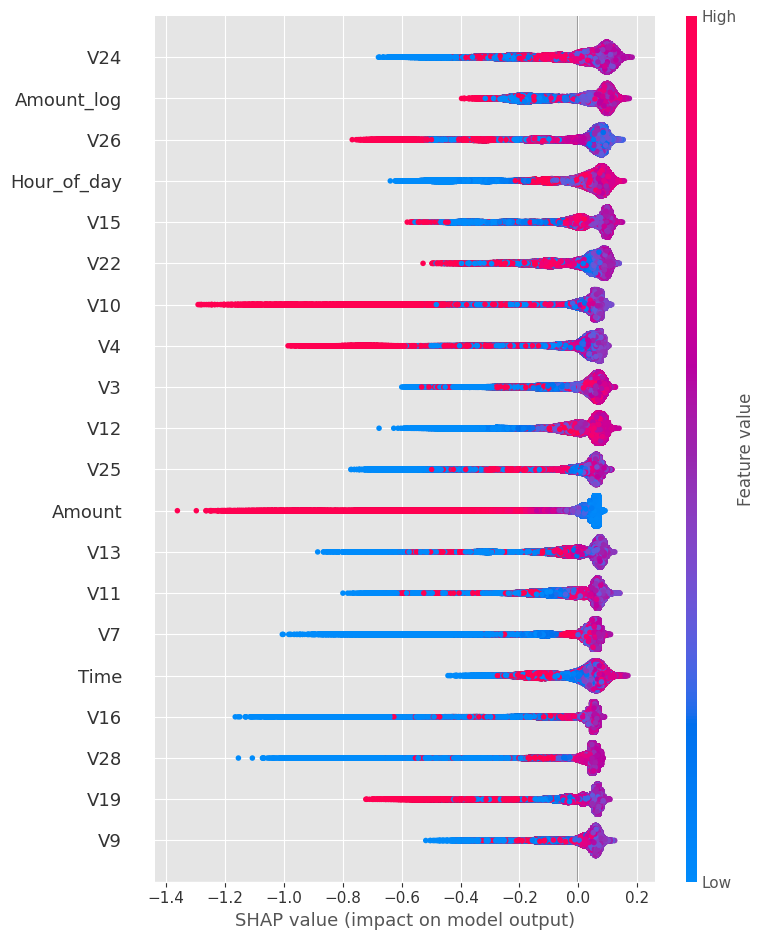

In [43]:
shap.summary_plot(shap_values, new_df.drop('Class', axis=1))

In [44]:
#Converting that array into a dataframe
outliers_df = df.iloc[neg_value_indices]

In [45]:
len(shap_values)

284807

A force plot is a visual that shows the influence of feature(s) on the predictions.

In [46]:
shap.force_plot(exp.expected_value, shap_values[492],features =new_df.drop('Class', axis=1).iloc[492,:] ,feature_names =new_df.drop('Class', axis=1).columns)

<a id='results'></a>
<font size="+2" color='#053c96'><b> Results</b></font>  
[back to top](#table-of-contents)

<a id='model-performance'></a>

<font size="+1" color='#780404'><b> Model Performance</b></font>  
[back to top](#table-of-contents)

#### Comparison to Baseline

In [47]:
# Random classifier baseline
baseline_model = DummyClassifier(strategy='uniform')

# Train and evaluate the baseline model
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_predictions)
baseline_precision = precision_score(y_test, baseline_predictions)
baseline_recall = recall_score(y_test, baseline_predictions)
baseline_f1 = f1_score(y_test, baseline_predictions)
#baseline_auroc = roc_auc_score(y_test, baseline_predictions)


In [48]:
# Train and evaluate your model
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
#auroc = roc_auc_score(y_test, predictions)


In [49]:
print("Baseline Accuracy:", baseline_accuracy)
print("Model Accuracy:", accuracy)
print()
print("Baseline Precision:", baseline_precision)
print("Model Precision:", precision)
print()
print("Baseline Recall:", baseline_recall)
print("Model Recall:", recall)
print()
print("Baseline F1 Score:", baseline_f1)
print("Model F1 Score:", f1)

Baseline Accuracy: 0.5013319126265317
Model Accuracy: 0.9765583377730421

Baseline Precision: 0.48210526315789476
Model Precision: 0.9809417040358744

Baseline Recall: 0.5077605321507761
Model Recall: 0.9700665188470067

Baseline F1 Score: 0.49460043196544273
Model F1 Score: 0.9754738015607581


#### Learning Curve

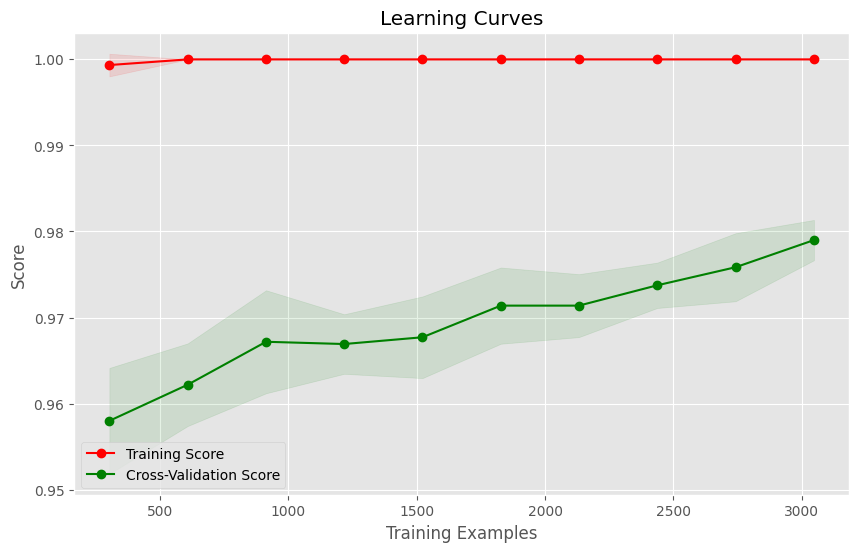

In [50]:
# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()


#### Error Analysis

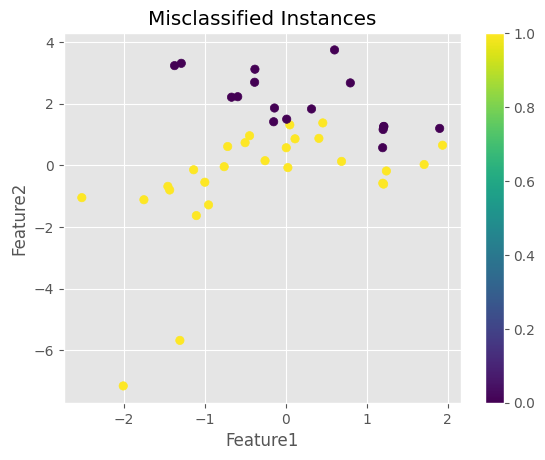

In [51]:
y_pred = classifier.predict(X_test)
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_instances = X_test.iloc[misclassified_indices]
true_labels = y_test.iloc[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]
# Example scatter plot
plt.scatter(misclassified_instances['V1'], misclassified_instances['V2'], c=true_labels)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Misclassified Instances')
plt.colorbar()
plt.show()


<a id='feature-importance'></a>

<font size="+1" color='#780404'><b> Feature Importance</b></font>  
[back to top](#table-of-contents)

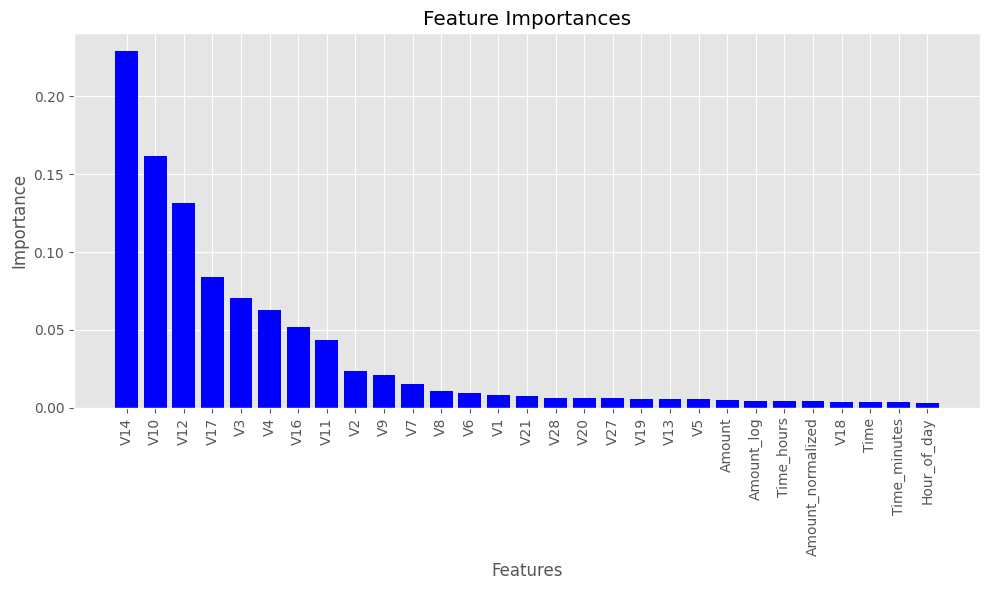

In [52]:
# Create a RandomForestClassifier instance
classifier = RandomForestClassifier()

# Fit the classifier on your training data
classifier.fit(X_train, y_train)

# Get feature importances
importances = classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


<a id='conclusion'></a>

<font size="+2" color='#053c96'><b> Conclusion</b></font>  
[back to top](#table-of-contents)

<a id='summary'></a>

<font size="+1" color='#780404'><b> Summary</b></font>  
[back to top](#table-of-contents)  

The goal of this project is to build a fraud detection model for FriendPay, a competitor of PayPal, to help them improve their credit card fraud identification system and increase revenue from transaction fees. The dataset provided contains credit card transactions made by European cardholders in September 2013. It is a highly imbalanced dataset, with only 492 fraud cases out of 284,807 transactions.  

To begin the project, several exploratory data analysis (EDA) techniques were employed. Plots were created to visualize the relationships between the features in the dataset. The dataset consists of numerical features obtained from a PCA transformation, except for the 'Time' and 'Amount' features. Boxplots were used to detect outliers in the dataset, and measures of skewness and kurtosis were examined to assess the distribution of the features.  

To enhance the model's performance, new features were created using the 'Time' and 'Amount' features. For example, the 'Time' feature was transformed to represent the seconds elapsed between each transaction and the first transaction in the dataset. Additionally, new features related to the 'Amount' feature were derived to provide additional information for fraud detection.  

As the dataset is highly imbalanced, combining over and undersampling techniques were employed to tackle the class imbalance. This approach helps in generating a balanced dataset by oversampling the minority class (frauds) and undersampling the majority class (non-frauds), resulting in a more representative training set.  

Classification was used as the modeling technique, and a pipeline was constructed to streamline the preprocessing and modeling steps. Multiple classification algorithms were evaluated using the pipeline, including LinearSVC, RandomForestClassifier, DecisionTreeClassifier, SVC, LogisticRegression, KNeighborsClassifier, and GradientBoostingClassifier.  

The performance of each model was assessed using evaluation metrics such as accuracy, precision, recall, F1 score, and the area under the precision-recall curve (AUPRC). Among the evaluated models, the Random Forest Classifier demonstrated the best performance based on the chosen evaluation metrics.  

Throughout the project, emphasis was placed on the impact of the model on FriendPay's business. The ability of the model to accurately identify fraudulent transactions while allowing genuine ones was crucial for customer satisfaction and increasing revenue from transaction fees.  

<a id='limitations'></a>

<font size="+1" color='#780404'><b> Limitations</b></font>  
[back to top](#table-of-contents)

- The dataset provided for this project contains anonymized features resulting from a PCA transformation, which limits our ability to interpret and understand the underlying meaning of the features. This lack of interpretability may hinder our ability to derive meaningful insights from the data.

- Due to confidentiality issues, we do not have access to the original features or additional background information about the data. This limitation may restrict our understanding of the context and potential underlying factors contributing to credit card fraud.

- The dataset is highly imbalanced, with a very low percentage of fraud cases. This class imbalance may impact the model's ability to accurately identify fraudulent transactions and may result in biased predictions towards the majority class.

- The success of the fraud detection model heavily relies on the quality and representativeness of the available data. If the provided dataset is not fully representative of the broader population of credit card transactions, the model's performance may be limited.

- External factors and evolving fraud patterns in the credit card industry may not be fully captured by the historical dataset. This limitation may affect the model's ability to generalize and adapt to emerging fraud techniques.

- The performance of the model will be evaluated based on the available evaluation metrics such as AUPRC. However, these metrics may not fully capture the real-world impact and financial consequences of misclassifying fraudulent transactions or denying genuine transactions.

- The implementation and performance of the selected classification algorithms may be influenced by various hyperparameters and model assumptions. Fine-tuning these parameters and considering alternative algorithms could potentially yield different results.

- The model's performance and impact on revenue generation will be assessed based on historical data. However, it is important to continuously monitor and evaluate the model's performance in real-time to ensure its effectiveness and adaptability to changing fraud patterns.

<a id='recommendations'></a>

<font size="+1" color='#780404'><b> Recommendations</b></font>  
[back to top](#table-of-contents)

1. Feature Interpretation: Although the dataset consists of PCA-transformed features, it would be valuable to explore the possibility of reconstructing some of the original features or deriving additional meaningful features. This could provide more interpretability and improve the understanding of the underlying factors contributing to credit card fraud.

2. Incorporate External Data: Consider incorporating external data sources, such as industry-wide fraud patterns, historical fraud data, or socio-economic indicators, to enhance the model's performance and improve its ability to adapt to evolving fraud techniques.

3. Continuous Model Monitoring: Implement a robust monitoring system to track the model's performance over time. Regularly evaluate its effectiveness in detecting fraudulent transactions and adjust the model as needed. This will help maintain the model's accuracy and reliability in the face of changing fraud patterns.

4. Ensemble Models: Explore the use of ensemble models, such as combining multiple classification algorithms or utilizing ensemble learning techniques like bagging or boosting. Ensemble methods can potentially improve the model's predictive power and overall performance.

5. Advanced Anomaly Detection: Consider incorporating advanced anomaly detection techniques, such as isolation forests or one-class support vector machines, to complement the classification model. These techniques focus on detecting unusual patterns in the data and can be effective in identifying fraudulent transactions.

6. Customer Profiling: Develop customer profiles based on transaction history and behavior to capture individual spending patterns. By incorporating customer-specific features, the model can better distinguish between legitimate transactions and anomalies for each customer, enhancing fraud detection accuracy.

7. Collaborative Fraud Detection: Explore partnerships or collaborations with other financial institutions or payment processors to share anonymized fraud data and insights. This collaborative approach can improve fraud detection capabilities by leveraging collective intelligence and detecting fraud patterns across a broader network.

8. Regular Model Updates: Stay proactive in updating the model with new data and retraining it regularly. As new fraudulent schemes emerge, continuously update the model to adapt and enhance its fraud detection capabilities.

9. Explainable AI: Investigate methods to increase the explainability of the model's predictions, especially in the context of regulatory requirements or customer trust. Explainable AI techniques can provide insights into the reasoning behind the model's decisions, improving transparency and accountability.

10. Feedback Loop: Establish a feedback loop with fraud investigators and analysts to gather their insights and expertise. Incorporate their feedback into model improvement and refinement processes, fostering a collaborative and iterative approach to fraud detection.

<a id='references'></a>

<font size="+1" color='#780404'><b> References</b></font>  
[back to top](#table-of-contents)

1. Breunig, M. M., Kriegel, H. P., Ng, R. T., & Sander, J. (2000). Lof: Identifying density-based local outliers. ACM Transactions on Knowledge Discovery from Data (TKDD), 2(1), 53-78.
2. Kriegel, H. P., Kröger, F., Schubert, M., & Zimek, A. (2009). Local outlier probability: A novel density-based outlier detection method. In Proceedings of the 26th international conference on machine learning (pp. 445-452). ACM.
3. Zimek, A., Schubert, M., & Kriegel, H. P. (2012). Outlier ensembles: Algorithms and evaluation. ACM Transactions on Knowledge Discovery from Data (TKDD), 6(1), 1-42.
4. Sachin Date (Nov 27, 2021), The Poisson Hidden Markov Model for Time Series Regression, from https://towardsdatascience.com/the-poisson-hidden-markov-model-for-time-series-regression-236c269914dd
5. Aishwarya Singh — Published On October 31, 2019, Build Better and Accurate Clusters with Gaussian Mixture Models from https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/  
6. Aman Gupta — Published On October 10, 2020, Feature Selection Techniques in Machine Learning from https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/  
7. Kunal Jain — Published On July 7, 2013, How to create Financial models flawlessly?, from https://www.analyticsvidhya.com/blog/2013/07/financial-model-flawless/  
8. guest_blog — Published On December 4, 2022, XAI: Accuracy vs Interpretability for Credit-Related Models, from https://www.analyticsvidhya.com/blog/2022/12/xai-accuracy-vs-interpretability-for-credit-related-model/  
9. Sachin Date (Nov 6, 2021), A Math Lover’s Guide to Hidden Markov Models, from https://towardsdatascience.com/a-math-lovers-guide-to-hidden-markov-models-ad718df9fde8  
10. Rishit Seth (Jan 2, 2020), HOW TO DETECT AND PREVENT FINANCIAL STATEMENT FRAUD, from https://www.linkedin.com/pulse/how-detect-prevent-financial-statement-fraud-rishit-seth/  
11. WILL KENTON (Oct 25, 2021), Beneish Model: Definition, Examples, M-Score Calculation, from https://www.investopedia.com/terms/b/beneishmodel.asp  
12. Leonard Pierce (August 13, 2021) Spotting Financial Statement Fraud: Fraud detection, from https://www.producebluebook.com/2021/08/13/spotting-financial-statement-fraud-fraud-detection/  
13. Mehdi Rad, Ali Amiri, Mohammad Hussein Ranjbar & Hojatollah Salari, 2021, Predictability of financial statements fraud-risk using Benford’s Law, from https://www.tandfonline.com/doi/pdf/10.1080/23322039.2021.1889756  
- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018, IEEE

- Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG Ph.D. thesis (supervised by G. Bontempi)

- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018, Springer International Publishing

- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

- Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook